# Нейросеть с одним скрытым слоем на MNIST

Попробуем применить модель с одним скрытым слоем на датасете MNIST. Необходимо будет реализовать функцию, обучающую модель и понять, в какое качество мы "упираемся".

## Загрузим данные

In [0]:
import keras
import numpy as np

from keras.datasets import mnist
from keras.utils import np_utils

from keras.layers import Dense
from keras.layers.core import Activation
from keras.models import Sequential

import matplotlib.pyplot as plt

Для воспроизводимости расчетов воспользуемся стандартным разбиением на обучающую и тестовую выборки

In [0]:
train, test = mnist.load_data()

x_train = train[0]
y_train = train[1]

x_test = test[0]
y_test = test[1]

Перед тем, как начать работу, посмотрите на данные глазами

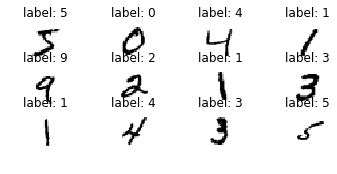

In [12]:
images_and_labels = list(zip(x_train,  y_train))
for index, (image, label) in enumerate(images_and_labels[:12]):
    plt.subplot(5, 4, index + 1)
    plt.axis('off')
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title('label: %i' % label )

Преобразуем данные: сделаем так, чтобы мы работали с матрицей, у которой значения от 0 до 1

In [13]:
x_train = x_train.reshape(60000, 28*28)
x_test = x_test.reshape(10000, 28*28)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

60000 train samples
10000 test samples


А таргет сделаем категориальной переменной (то есть значение таргета по индексу k будет говорить, является ли эта цифра k)

In [0]:
num_classes = 10
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

## Построим модель для обучения

Зафиксируем гиперпараметры сети

In [0]:
batch_size = 128
epochs = 10

In [0]:
def get_accuracies_of_wide_model(units, data, batch_size=128, epochs=10, n_iterations=5):
    """
    Функция создает модель с одним скрытым слоем с количеством вершин units,
    обучается на данных data с гиперпараметрами batch_size и epochs количество
    раз, равное n_iterations и возвращает массив метрик качества на каждой итерации.
    
    Для функции активации используйте relu, на последнем слое используйте softmax.
    
    :param units: количество вершин (регулируем)
    :param batch_size: размер батча (берем по дефолту)
    :param epochs: количество эпох (берем по дефолту)
    :param n_iterations: количество итераций (берем по дефолту)
    :param data: кортеж, (x_train, y_train, x_test, y_test)
    :return: массив, качество на тестовой выборке по каждой итерации
    """
    
    x_train, y_train, x_test, y_test = data
    accuracies = []
    
    for i in range(n_iterations):
        model = Sequential()
        # добавление необходимых слоев
        model.add(Dense(1024, activation="relu", input_shape=(784,)))
        model.add(Dense(10, activation="softmax"))
        # компилируем модель (не меняйте параметры)
        model.compile(optimizer="adam",
                loss='categorical_crossentropy',
                 metrics=["accuracy"])
        
        # обучение (указать правильные параметры)
        history = model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))
        #получение конечного качества на тестовой выборке
        accuracy = model.evaluate(x_test, y_test, verbose=0)
        
        
        accuracies.append(accuracy)
    
    return accuracies[0]

Переберем разное количество вершин в нашей сети. Чтобы сильно не напрягать компьютер, не берите больше 3000 вершин.

Задача со звездочкой: постройте график качества и посмотрите, изменяется ли оно

In [33]:
# делаем массив вершин (рекомендуем брать до 3000)
units_list = [3000]
              
data = (x_train, y_train, x_test, y_test)
results = [get_accuracies_of_wide_model(units, data) for units in units_list]

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 13s 213us/step - loss: 0.2376 - acc: 0.9318 - val_loss: 0.1255 - val_acc: 0.9622
Epoch 2/10
60000/60000 [==============================] - 10s 171us/step - loss: 0.0899 - acc: 0.9730 - val_loss: 0.0937 - val_acc: 0.9717
Epoch 3/10
60000/60000 [==============================] - 10s 173us/step - loss: 0.0574 - acc: 0.9825 - val_loss: 0.0715 - val_acc: 0.9783
Epoch 4/10
60000/60000 [==============================] - 10s 171us/step - loss: 0.0391 - acc: 0.9880 - val_loss: 0.0668 - val_acc: 0.9801
Epoch 5/10
60000/60000 [==============================] - 10s 173us/step - loss: 0.0269 - acc: 0.9920 - val_loss: 0.0627 - val_acc: 0.9818
Epoch 6/10
60000/60000 [==============================] - 11s 177us/step - loss: 0.0190 - acc: 0.9948 - val_loss: 0.0609 - val_acc: 0.9809
Epoch 7/10
60000/60000 [==============================] - 10s 173us/step - loss: 0.0137 - acc: 0.9960 - val_loss: 0.

# Ответы для формы

Ответом для формы должно служить максимальное качество на тестовой выборке. Поскольку в keras результаты разнятся от запуска к запуску, правильный ответ будет засчитан как интервал

In [34]:
max_results = max([max(result) for result in results])
print('{:.4f}'.format(max_results))

0.9822
